In [ ]:
pip install praw networkx matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
import praw
import networkx as nx
import matplotlib.pyplot as plt
import collections

reddit = praw.Reddit(
    user_agent="osna project-1",
    client_id="pf0JuRW6y2ZsSjB91LFo7w",
    client_secret="22tWh-FTLQz_cvj4D3ClZ3ktzmvSrQ",
    username="osnaproj",
    password="Reddit@1996",
)

def fetch_interactions(subreddit_name="science", post_limit=5):
    interactions = {}  # Track Interactions

    subreddit = reddit.subreddit(subreddit_name)

    # Iterate over hot posts based on the limit
    for post in subreddit.hot(limit=post_limit):
        post.comment_sort = 'new'
        post.comments.replace_more(limit=0)  # Replace MoreComments with Actual Comments by Setting limit = 0
        comments = post.comments.list()

        # Iterate over comments to store interactions
        for comment in comments:
            # Skip if the comment has no author (deleted) or is a top-level comment
            if not comment.author or comment.is_root:
                continue

            # Get the parent comment or submission
            parent = comment.parent()
            if isinstance(parent, praw.models.Submission):
                continue

            if parent.author and parent.author != comment.author:
                interaction_key = f"{parent.author.name} -> {comment.author.name}"
                interactions[interaction_key] = interactions.get(interaction_key, 0) + 1

    return interactions

interactions = fetch_interactions("science", 5)

print(interactions);


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

{'Raudskeggr -> tagun': 1, 'johnny2fives -> overthinker356': 1, 'AaronLewisRAtheism -> AnotherQuark': 1, 'IndyPoker979 -> Downtown_Counter_395': 1, 'IndyPoker979 -> SpiffySpacemanSpiff': 1, 'IndyPoker979 -> Routine-Draw-7446': 1, 'ATownStomp -> Vinto47': 1, 'quiet_timer -> PoliticalJunkDrawer': 3, 'overthinker356 -> Cubey42': 1, 'AnotherQuark -> hot_chopped_pastrami': 1, 'Routine-Draw-7446 -> Cargobiker530': 1, 'Routine-Draw-7446 -> IndyPoker979': 1, 'Routine-Draw-7446 -> bbbbBeaver': 1, 'Routine-Draw-7446 -> MrslaveXxX': 1, 'PoliticalJunkDrawer -> Kakarot_faps': 1, 'PoliticalJunkDrawer -> quiet_timer': 3, 'Cubey42 -> overthinker356': 1, 'MrslaveXxX -> TA2556': 1, 'MrslaveXxX -> jch60': 1, 'Kakarot_faps -> Testiculese': 1, 'quiet_timer -> TangerineX': 2, 'TA2556 -> Cysolus': 1, 'jch60 -> conventionistG': 1, 'jch60 -> highpl4insdrftr': 1, 'TangerineX -> quiet_timer': 1, 'quiet_timer -> Testiculese': 2, 'Testiculese -> quiet_timer': 2, 'jaymzx0 -> ControlAgent13': 1, 'michaelb1 -> Virina

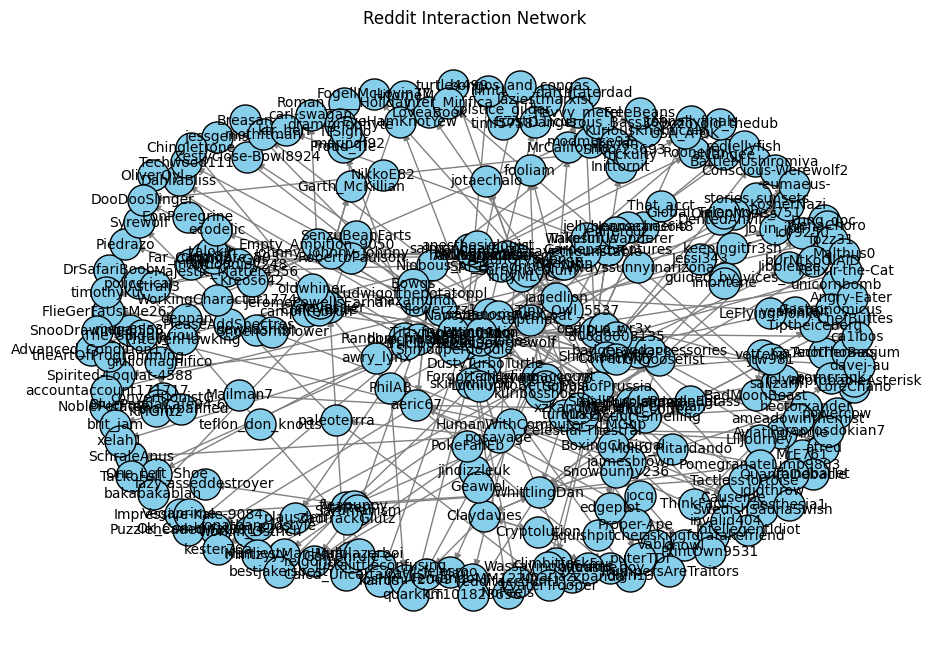

In [ ]:

# Network analysis
G = nx.DiGraph()

# Adding edges to the graph based on interactions
for interaction, count in interactions.items():
    source, target = interaction.split(' -> ')
    G.add_edge(source, target, weight=count)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_color='skyblue', edgecolors='black', node_size=500)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color='gray', width=1)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Reddit Interaction Network")
plt.axis('off')
plt.show()


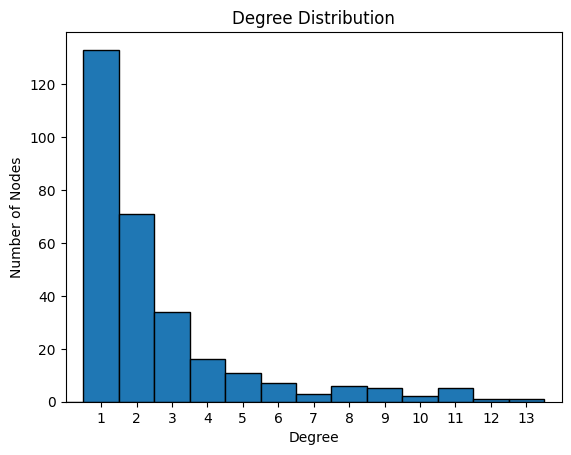

In [ ]:
degrees = [G.degree(n) for n in G.nodes()]
degree_counts = collections.Counter(degrees)

unique_degrees = list(degree_counts.keys())
unique_degrees.sort()

plt.figure()
plt.hist(degrees, bins=range(0, max(unique_degrees) + 2), edgecolor='black', align='left')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")

plt.xticks(unique_degrees)
plt.xlim(0, max(unique_degrees) + 1)
plt.show()

In [ ]:
print("Average Clustering Coefficient:", clustering_coefficient)
clustering_coefficient = nx.average_clustering(G.to_undirected())


Average Clustering Coefficient: 0.027080979284369117


In [ ]:
pagerank = nx.pagerank(G)
print("PageRank:", pagerank)


PageRank: {'DustyTurboTurtle': 0.0014013275178551589, 'stories_sunsets': 0.0019969259500503935, 'Ok_Combination_8262': 0.0019969259500503935, 'timf5758': 0.0014013275178551589, 'solstice_gilder': 0.002592524382245629, 'jaimesbrown': 0.0014013275178551589, 'askingforafakefriend': 0.002592524382245629, 'teflon_don_knotts': 0.0014013275178551589, 'police-ical': 0.0019969259500503935, 'Justalittleconfusing': 0.0019969259500503935, 'Jessi343': 0.0014013275178551589, 'keepingitfr3sh': 0.002592524382245629, 'itsnobigthing': 0.002542802689414237, 'Spirited-Loquat-4588': 0.0016715205371722764, 'NoFeels': 0.0016715205371722764, 'redditaccount1_2': 0.0016715205371722764, 'jessgems': 0.0016715205371722764, 'Lung_doc': 0.0038752857923353744, 'Dr_D-R-E': 0.006042686127829136, 'Jennacheerio': 0.0019720651036346975, 'oedipus_wr3x': 0.0019720651036346975, 'Gardenadventures': 0.002542802689414237, 'giuliomagnifico': 0.0014013275178551589, 'meganlo3': 0.0019969259500503935, 'conventionistG': 0.0051910555

In [ ]:

largest_scc = max(nx.strongly_connected_components(G), key=len)
subgraph = G.subgraph(largest_scc)

diameter = nx.diameter(subgraph.to_undirected())
print("Diameter of largest strongly connected component:", diameter)


Diameter of largest strongly connected component: 6


In [ ]:
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:", closeness_centrality)


Closeness Centrality: {'DustyTurboTurtle': 0.0, 'stories_sunsets': 0.003401360544217687, 'Ok_Combination_8262': 0.003401360544217687, 'timf5758': 0.0, 'solstice_gilder': 0.003401360544217687, 'jaimesbrown': 0.0, 'askingforafakefriend': 0.003401360544217687, 'teflon_don_knotts': 0.0, 'police-ical': 0.003401360544217687, 'Justalittleconfusing': 0.003401360544217687, 'Jessi343': 0.0, 'keepingitfr3sh': 0.003401360544217687, 'itsnobigthing': 0.01020408163265306, 'Spirited-Loquat-4588': 0.008771929824561403, 'NoFeels': 0.008771929824561403, 'redditaccount1_2': 0.008771929824561403, 'jessgems': 0.008771929824561403, 'Lung_doc': 0.012523191094619666, 'Dr_D-R-E': 0.017492711370262388, 'Jennacheerio': 0.01020408163265306, 'oedipus_wr3x': 0.01020408163265306, 'Gardenadventures': 0.01020408163265306, 'giuliomagnifico': 0.0, 'meganlo3': 0.003401360544217687, 'conventionistG': 0.007653061224489796, 'WenaChoro': 0.010629251700680274, 'itsfinallyfinals': 0.008771929824561403, 'illmtl': 0.0087719298245

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:", betweenness_centrality)


Betweenness Centrality: {'DustyTurboTurtle': 0.0, 'stories_sunsets': 0.0, 'Ok_Combination_8262': 0.0, 'timf5758': 0.0, 'solstice_gilder': 0.0, 'jaimesbrown': 0.0, 'askingforafakefriend': 0.0, 'teflon_don_knotts': 0.0, 'police-ical': 0.0, 'Justalittleconfusing': 0.0, 'Jessi343': 0.0, 'keepingitfr3sh': 2.3217478117526874e-05, 'itsnobigthing': 0.00048756704046806434, 'Spirited-Loquat-4588': 0.0, 'NoFeels': 0.0, 'redditaccount1_2': 0.0, 'jessgems': 0.0, 'Lung_doc': 0.00010447865152887093, 'Dr_D-R-E': 0.0012073088621113975, 'Jennacheerio': 6.965243435258063e-05, 'oedipus_wr3x': 0.0, 'Gardenadventures': 0.00013930486870516125, 'giuliomagnifico': 0.0, 'meganlo3': 0.0, 'conventionistG': 5.8043695293817184e-05, 'WenaChoro': 0.0, 'itsfinallyfinals': 0.0, 'illmtl': 0.0, 'BluePandaCafe94-6': 4.643495623505375e-05, 'NoblePotatoe': 0.0, '6SucksSex': 0.0005920456919969353, 'MrE761': 0.0, 'KMGritz': 0.0, 'DahliaBliss': 0.0, 'Breasan': 0.0, 'Shmooperdoodle': 0.0, 'Inittornit': 8.126117341134406e-05, 'K